In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('obesity_data.csv')
df.shape

(1000, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [4]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [5]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Age'].nunique()

62

In [9]:
df['BMI'].nunique()

1000

In [10]:
df['Weight'].nunique()

1000

In [11]:
df['ObesityCategory'].nunique()

4

In [12]:
df['PhysicalActivityLevel'].nunique()

4

In [13]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [14]:
df['ObesityCategory'].unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [15]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [16]:
mapping = {"Underweight": 0,"Normal weight": 1,"Overweight": 2,"Obese": 3}

df['ObesityCategory'] = df['ObesityCategory'].map(mapping)

In [17]:
df['ObesityCategory'].unique()

array([1, 3, 2, 0], dtype=int64)

In [18]:
df['ObesityCategory'].value_counts()

ObesityCategory
1    371
2    295
3    191
0    143
Name: count, dtype: int64

In [19]:
df.skew()

Age                     -0.065755
Height                   0.009357
Weight                  -0.090733
BMI                      0.252872
PhysicalActivityLevel   -0.042192
ObesityCategory          0.067242
Gender_Male             -0.092236
dtype: float64

In [20]:
df['PhysicalActivityLevel']=np.log1p(df['PhysicalActivityLevel'])

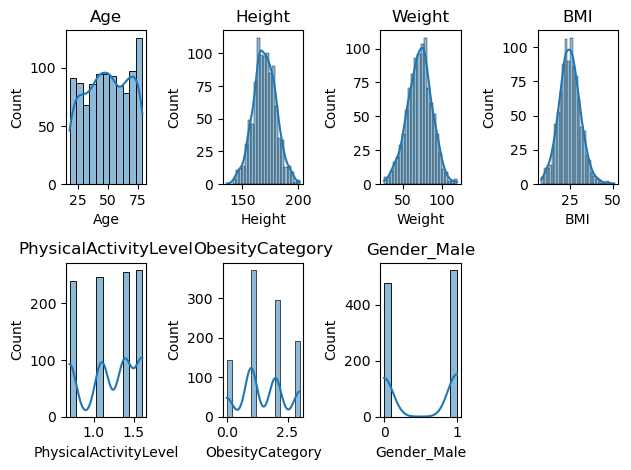

In [21]:
plt.Figure(figsize=(5000,10))
for i,cols in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.histplot(df[cols],kde=True,fill=True)
    plt.title(cols)
plt.tight_layout()
plt.show()

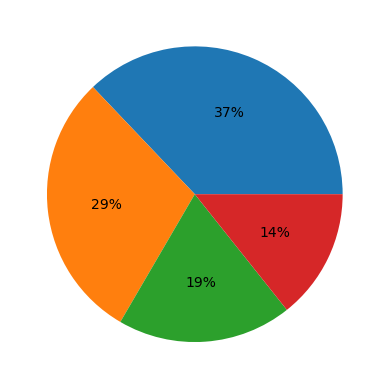

In [22]:
plt.pie(df['ObesityCategory'].value_counts(), autopct='%0.0f%%')
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df.drop(columns=['ObesityCategory'])
y = df['ObesityCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [24]:
X_resampled.value_counts()
y_resampled.value_counts()

ObesityCategory
2    297
1    297
0    297
3    297
Name: count, dtype: int64

In [25]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score

In [26]:
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

In [27]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rf_clf),('gb', gb_clf),('svm', svm_clf)],voting='soft')

In [28]:
voting_clf.fit(X_resampled, y_resampled)
y_pred = voting_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test,y_pred,average=None))

c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Recall: [1. 1. 1. 1.]


In [29]:
print("Precision per class:", precision_score(y_test, y_pred, average=None))
print("F1-score per class:", f1_score(y_test, y_pred, average=None))

Precision per class: [1. 1. 1. 1.]
F1-score per class: [1. 1. 1. 1.]


In [30]:
import pickle

filename = 'trained_model.sav'
with open(filename, 'wb') as f:
    pickle.dump((voting_clf), f)
print("Model saved successfully!")


Model saved successfully!
